In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from matplotlib import animation

In [2]:
from JSAnimation.IPython_display import display_animation
from IPython.display import display, HTML

## 重新认识 cartpole 环境

- 小滑块/倒立摆
- 典型的 mdp（markov decision process）
    - 下一时刻的状态（转移）$s_{t+1}$ 只跟当前状态 $s_t$ 和（当前状态下采取的）$a_t$ 有关
- action space is discrete and finite
- state（observation）space is continuous

In [3]:
env = gym.make('CartPole-v1')

### state/space

In [4]:
# init space
env.reset()

(array([ 0.03425077,  0.00205355,  0.02223633, -0.01758351], dtype=float32),
 {})

In [5]:
# action space
print(env.action_space)

Discrete(2)


In [6]:
print(env.action_space.n)

2


In [7]:
# observation space
# https://www.gymlibrary.dev/environments/classic_control/cart_pole/
print(env.observation_space)
print(env.observation_space.low)
print(env.observation_space.high)

Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


### one episode

In [22]:
env = gym.make('CartPole-v1', render_mode = 'rgb_array')
# observation = env.reset()
state = env.reset()
steps = 0
frames = []
while True:
    frames.append(env.render())
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    steps += 1
    print(f'step: {steps}, state: {state}')
    if terminated or truncated:
        break

step: 1, state: [-0.03728474  0.19366638  0.00589101 -0.27639282]
step: 2, state: [-0.03341141 -0.00153911  0.00036315  0.01814228]
step: 3, state: [-0.03344219 -0.19666627  0.000726    0.31093976]
step: 4, state: [-0.03737552 -0.00155467  0.00694479  0.01848589]
step: 5, state: [-0.03740661  0.193467    0.00731451 -0.2719978 ]
step: 6, state: [-0.03353727 -0.00175856  0.00187455  0.02298313]
step: 7, state: [-0.03357244  0.19333646  0.00233422 -0.26910776]
step: 8, state: [-0.02970571  0.38842502 -0.00304794 -0.5610536 ]
step: 9, state: [-0.02193721  0.5835896  -0.01426901 -0.8546952 ]
step: 10, state: [-0.01026542  0.38866502 -0.03136291 -0.56653297]
step: 11, state: [-0.00249212  0.19399674 -0.04269357 -0.28389335]
step: 12, state: [ 0.00138782 -0.0004911  -0.04837144 -0.00497553]
step: 13, state: [ 0.00137799 -0.19488716 -0.04847095  0.27206182]
step: 14, state: [-0.00251975 -0.38928515 -0.04302971  0.5490715 ]
step: 15, state: [-0.01030545 -0.58377707 -0.03204829  0.8278925 ]
step

In [9]:
frames

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [10]:
def display_frames_as_gif(frames, output):
    """
    Displays a list of frames as a gif, with controls
    以gif格式显示关键帧列，带有控件
    """
    
    fig = plt.figure(figsize=(frames[0].shape[1]/72.0, frames[0].shape[0]/72.0),dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        img = patch.set_data(frames[i])
        return img   ## *** return是必须要有的 ***
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    
    anim.save(output)
    return HTML(anim.to_jshtml())  ## *** 返回一个HTML对象，以便被调用者显示。 ***
    # display(display_animation(anim, default_mode='loop'))

MovieWriter ffmpeg unavailable; using Pillow instead.


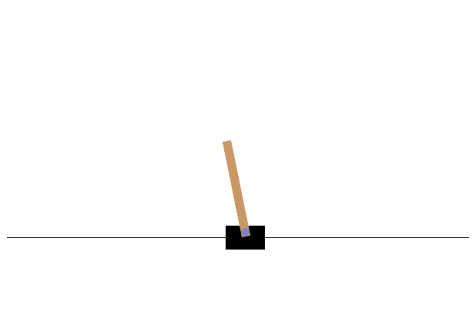

In [13]:
display_frames_as_gif(frames, output='./save/rand_cartpole.gif')
# display_frames_as_gif(frames, output='./save/rand_cartpole.mp4')

## 状态离散化

In [14]:
NUM_DIGITIZED = 6

# 分桶， 5个值，对应 6 个分段，即 6 个桶 (0, 1, 2, 3, 4, 5)
def bins(clip_min, clip_max, num_bins=NUM_DIGITIZED):
    return np.linspace(clip_min, clip_max, num_bins+1)[1:-1]

# 按 6 进制映射将 4位 6 进制数映射为 id，
def digitize_state(observation):
    pos, cart_v, angle, pole_v = observation
    digitized = [np.digitize(pos, bins=bins(-2.4, 2.4, NUM_DIGITIZED)), 
                 np.digitize(cart_v, bins=bins(-3., 3, NUM_DIGITIZED)), 
                 np.digitize(angle, bins=bins(-0.418, 0.418, NUM_DIGITIZED)), 
                 np.digitize(pole_v, bins=bins(-2, 2, NUM_DIGITIZED))]
    # 3,1,2,4 (4位10进制数) = 4*10^0 + 2*10^1 + 1*10^2 + 3*10^3，最终的取值范围是 0-9999，总计 10^4 == 10000
    # a,b,c,d (4位6进制数) = d*6^0 + c*6^1 + b*6^2 + a*6^3，最终的取值范围是 0-`5555`(1295)，总计 6^4 == 1296
    ind = sum([d*(NUM_DIGITIZED**i) for i, d in enumerate(digitized)])
    return ind
    

In [15]:
obs = env.reset()

In [16]:
obs

(array([-0.03894835,  0.02307888, -0.02234178, -0.04128922], dtype=float32),
 {})

In [17]:
bins(-2.4, 2.4, NUM_DIGITIZED)

array([-1.6, -0.8,  0. ,  0.8,  1.6])